In [ ]:
#link: https://colab.research.google.com/drive/12z9nJS79lX0NL44F5ByRvXIt84LS_k_j#scrollTo=s3uEHTSGV6Rk

# Text Preprocessing

This is process of cleaning dataset

types:
- basic
- advacned : parts of speech tag, chunking, parsing, co reference resolution

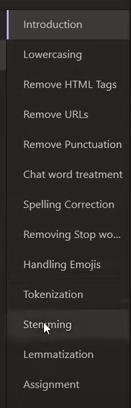

In [ ]:
# Modules Importing
import numpy as np
import pandas as pd

Step 1 : Lower case -> Convert the textual data into lower case you know reason why

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv').head()
df.head()

,review,sentiment


In [ ]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [ ]:
# Successfully Converted to lower case
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Removing HTML tags & URL's

These tags will be involed in the dataset while we are webscraping

This is solved using Regular Expression

In [ ]:
import re

# This function is for removing HTML tags
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
# Snippet code
text = 'a wonderful little production. <br /><br />the'
remove_html_tags(text)

'a wonderful little production. the'

In [ ]:
df['review'] = df['review'].apply(lambda x: remove_html_tags(x))

In [ ]:
# This function is for removing URL's

In [ ]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
# Test Cases of URL's
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click here https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

# Testing
remove_url(text4)


# Remove Puchtuation

Removing puctuation such as !@#$%^&*,.

# Why its important to remove puctation



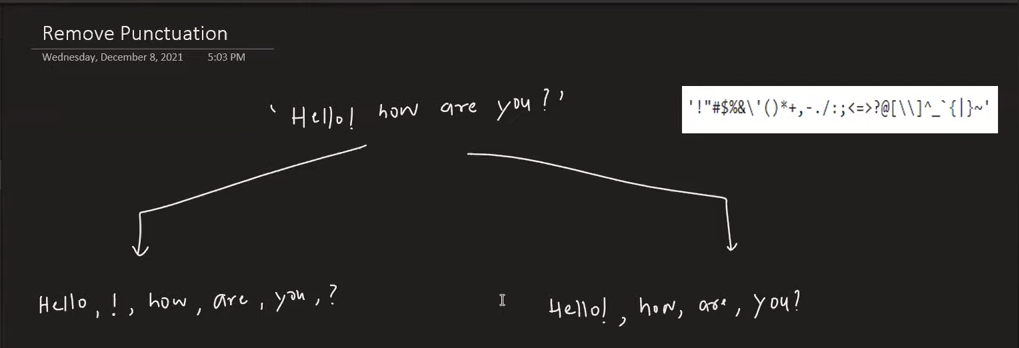!

In [ ]:
import string , time


In [ ]:
exclude = string.punctuation

In [ ]:
# Method 1
# Easy way but Slow method
def remove_punc(text):
  for char in exclude:
    if char in text:
      text = text.replace(char,'')
  return text

text = 'string. With. Puchtatuin?'
start = time.time()
remove_punc(text)
end = time.time()
print(end-start)

5.745887756347656e-05


In [ ]:
# Method 2
# Easy way but fast method
def remove_puncl(text):
  return text.translate(str.maketrans('','',exclude))

# sample Example
text = 'string. With. Puchtatuin?'
start = time.time()
remove_puncl(text)
end = time.time()
print(end-start)

9.036064147949219e-05


In [ ]:
# df['review'].apply(remove_puncl)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Chat Word treatment
It means now a day people write big words in short form such as ASAP, GN, GM etc

Solution : We can bring them to there full form using dictionary

In [ ]:
# I need to write a regular expression for this text and convert this into dictionary

chat_words = """AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA?	Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
TFW – That feeling when. TFW internet slang often goes in a caption to an image.
MFW – My face when
MRW – My reaction when
IFYP – I feel your pain
LOL – Laughing out loud
TNTL – Trying not to laugh
JK – Just kidding
IDC – I don’t care
ILY – I love you
IMU – I miss you
ADIH – Another day in hell
IDC – I don’t care
ZZZ – Sleeping, bored, tired
WYWH – Wish you were here
TIME – Tears in my eyes
BAE – Before anyone else
FIMH – Forever in my heart
BSAAW – Big smile and a wink
BWL – Bursting with laughter
LMAO – Laughing my a** off
BFF: Best friends forever
CSL – Can’t stop laughing """

In [ ]:
# after converting it into dictionary

In [ ]:
# this function converts ASAP -> As soon as possible
def chat_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

text = "ASAP come"
# chat_conversion(text)

# Spelling Correction

Correcting the spelling mistake in a sentences

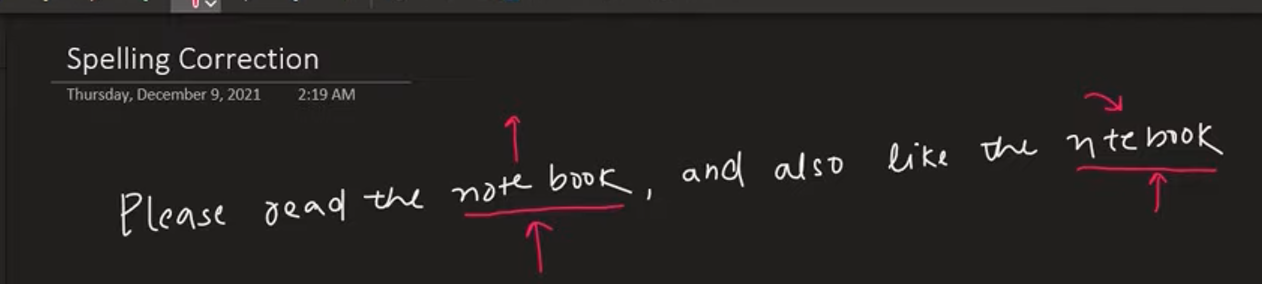

Here the **notebook** and **ntebook** are same but due to spelling mistake it will be considered different

Sol : a module is there to correct it

In [ ]:
# Accuracy is little low
from textblob import TextBlob

incorrect_text = 'ceertain condiotiond duriing seveal ggeneration aree mofiged in the saame manneeer'

textBlb = TextBlob(incorrect_text)
textBlb.correct().string

'certain condition during several generation are mofiged in the same manner'

# Removing Stop words

These are the words used to to form a sentences such as: a,is,the,

In [ ]:
from nltk.corpus import stopwords
nltk.download('all')
stopwords.words('english')

In [ ]:
def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)

text = 'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic'
remove_stopwords(text)

# Handling Emoji's

There is two way to handle emoji's
- remove
- replace

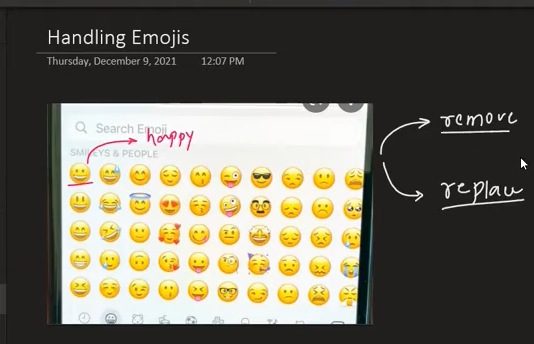

8.1 Simply Remove Emojis

In [ ]:
import re

# Again Here we use The Regular Expressions to Remove the Emojies from Text or Whole Corpus.
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Texts
text = "Loved the movie. It was 😘"
text1 = 'Python is 🔥'
print(text ,'\n', text1)

# Remove Emojies using Fucntion
print(remove_emoji(text))
remove_emoji(text1)

Loved the movie. It was 😘 
 Python is 🔥
Loved the movie. It was 


'Python is '

8.2 Simply Convert Emojis into text

In [ ]:
# We will USe the Emoji Libray to handle this task
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 10.2 MB/s eta 0:00:00


In [ ]:
# Calling the Emoji tool Demojize.
# Texts
text = "Loved the movie. It was 😘"
text1 = 'Python is 🔥'
print(emoji.demojize(text))
print(emoji.demojize(text1))

Loved the movie. It was :face_blowing_a_kiss:
Python is :fire:


# 9. Tokenization

It is a process of breaking the text docx into words which is also called as tokens

It has two types

- sentences tokenization -> breaks sentences in fullstop

ex :I am indian. I love my country => [[I am Indian],[I love my country]]

- Word Tokenization -> breaks sentences into words on spaces " "
ex: I am indian => [I, am, Indian]


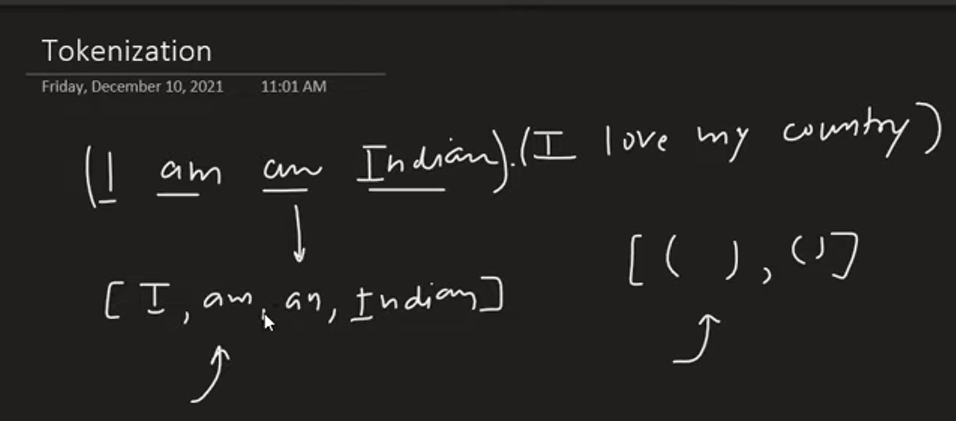

# Problems in Tokenization

the words split will be done wrong such as new-delhi = [new , delhi] but actually new-delhi is a single word these are some problem

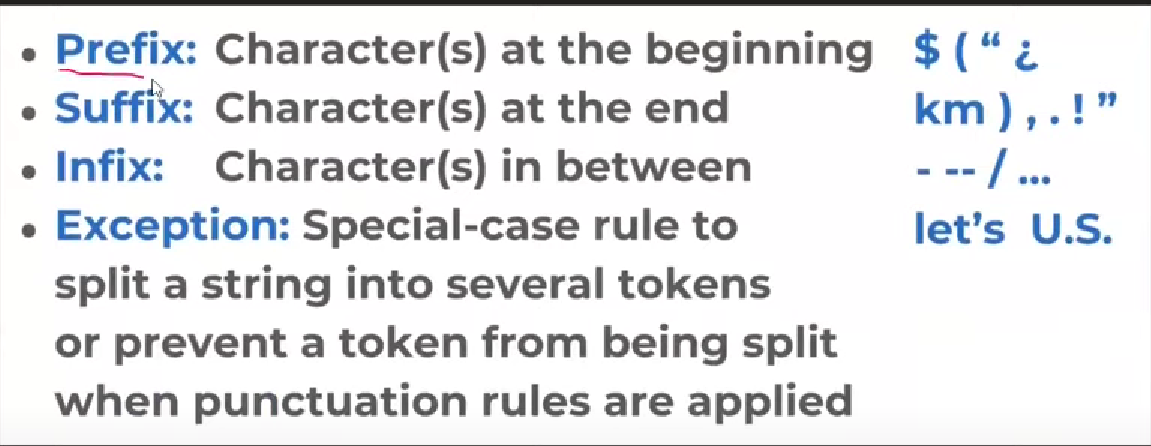

9.1 Using split function

In [71]:
# word Tokenization
sent1 = 'I am going to delhi'
sent1.split()

['T', 'am', 'going', 'to', 'delhi']

In [72]:
# Sentence Tokenization
sent2 = 'I am going to delhi. I will stay there for 4days. lets\'s hope the trip to be great'
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 4days',
 " lets's hope the trip to be great"]

9.2 Using Regular Expression

In [74]:
import re
sent3 = 'I am going to delhi'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

9.3 Using NLTK

In [76]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [77]:
sent1 = 'I am going to delhi'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'delhi']

In [80]:
sent2 = "It seems you're trying to measure the time taken by a function named remove_punc to process the string text. However, there are a few issues with your code snippet"
sent_tokenize(sent2)

["It seems you're trying to measure the time taken by a function named remove_punc to process the string text.",
 'However, there are a few issues with your code snippet']

In [81]:
#Accuracy problem in NLTK
sent3 = " I have a Ph.D in AI"
sent4 = "We're here to help! mail us at nks@gmail.com"
sent5 = "A 5km ride cost $10.50"



In [83]:
word_tokenize(sent3) #crct

['I', 'have', 'a', 'Ph.D', 'in', 'AI']

In [84]:
word_tokenize(sent4) # wrong

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

In [82]:
word_tokenize(sent4) #wrong

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

9.4 Using Spacy

better than NLTK

In [85]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [86]:
doc1 = nlp(sent3)
doc2 = nlp(sent4)
doc3 = nlp(sent5)


In [90]:
# for token in doc1:
#   print(token)
# for token in doc2:
#   print(token)
for token in doc3:
  print(token)

A
5
km
ride
cost
$
10.50


# 10 Stemming

Stemming is a text processing technique used in Natural Language Processing (NLP) to reduce a word to its root or base form by removing prefixes or suffixes. The goal of stemming is to group together words with similar meanings so they can be analyzed as a single concept.

For example:

- Running, runner, and runs → run
- Studied, studying, studies → studi

Two ways stemmer can be applied through NLTK
- Porter Stemmer -> only english
- Snowball Stemmer -> other languages

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#function
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

text = "walk walks walking walked"
stem_words(text)

'walk walk walk walk'

# 11 Lemmatization

Lemmatization is a technique in Natural Language Processing (NLP) used to reduce words to their base or dictionary form (called the lemma), while ensuring that the base form is a valid word. Unlike stemming, lemmatization considers the context and part of speech of a word to return a meaningful result.

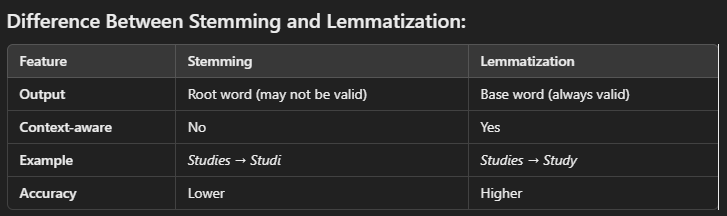

In [92]:
# We Will Import WordNetLemmatizer from NLTK Library.
from nltk.stem import WordNetLemmatizer
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Sentence
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Intilize Punctuation
punctuations="?:!.,;"

# Tokenize Word
sentence_words = nltk.word_tokenize(sentence)

# Using a Loop to Remove Punctuations.
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
# Printing Word and Lemmatized Word
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 
